# Campo de Velocidades de una ecuación diferencial

**Recordar concepto**

Suponga la ecuación diferencial

\begin{equation}
\dfrac{dy(t)}{dt} = f(t,y)
\end{equation}

El campo de velocidades en el plano (t,y) evaluado en cierto punto $(t_0,y_0)$ de define como el vector

\begin{equation}
u \big|_{t_0,y_0}  = (u_1 , u_2) :=\dfrac{1}{\sqrt{ V_1^2 +  V_2^2 } } ( V_1 ,  V_2) 
\end{equation}

donde $ V_1 = \dfrac{dt}{dt}= 1$ y  $V_2 = \dfrac{dy}{dt} \big|_{t_0,y_0} $.


El campo de velocidades nos sirve obtener información "cualitativa" del comportamiento de la solución a la ecuación diferencial. En particular podemos obtener información de:

- Puntos de equilibrio.
- Puntos de silla.
- Regiones de crecimiento y decrecimiento dependiendo de la condición inicial.

Nota: NO tenemos que resolver la ecuación para hallar su campo de velocidades!


### Ejemplo

Considere el siguiente problema de evolución

\begin{equation}
\dfrac{dy(t)}{dt} = y-y^2
\end{equation}
Con condicion inicial $y(0)=y_0$. Considerando lo anterior

- Encuentre el campo de velocidades de la siguiente ecuación diferencial en un intervalo de tiempo $[0, 10]$ para diferentes condiciones iniciales entre $[-2, 2]$. 

- Usando el campo de velocidades estime, si existen, los puntos de equilibrio y de silla. 


- Usando el campo de velocidades estime para que valores de las condiciones iniciales la solución deberá ser creciente y decreciente. 


- Del campo de velocidades escoja dos condiciones iniciales. Una para la cual la solución es creciente y la otra para una solución decreciente. Resuelva la ecuación diferencial usando el método de Euler para ambos casos y verifique que las soluciones obtenidas están en concordancia con crecimiento predicho por el campo de velocidades.





**Solución**

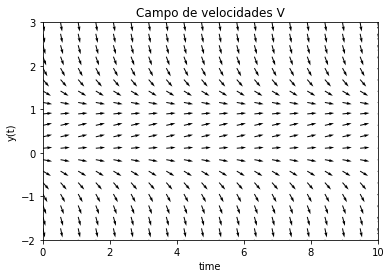

In [45]:
import numpy as np
import matplotlib.pyplot as plt


#--------Ecuacion diferencial-----
def Ec_differencial(y):
    dydt = y - y**2
    return dydt
#---------------------------------


#---Definiendo parametros---
t0 = 0
tf = 10

ymin = -2
ymax =  3
#---------------------------


#Numero de puntos
N   =  20

 
#valores del tiempo
t  = np.linspace(t0, tf, N)

#valores de la funcion
y  = np.linspace(ymin,ymax, N)


#Creando la malla de puntos (t,Y)
T, Y = np.meshgrid(t, y)


#-------------Vector de velocidades ------------------
#componente horizontal
Vx = 1

#componente vertical
Vy = Ec_differencial(Y)

#Normalizando el vector
Norma = np.sqrt(Vx**2 + Vy**2)

ux = Vx / Norma
uy = Vy / Norma
#----------------------------------------------------



#graficando el campo de velocidades
plt.quiver(T, Y, ux, uy )
plt.title("Campo de velocidades V")
plt.xlabel('time')
plt.ylabel('y(t)')
plt.axis([t0, tf, ymin, ymax])
plt.show()

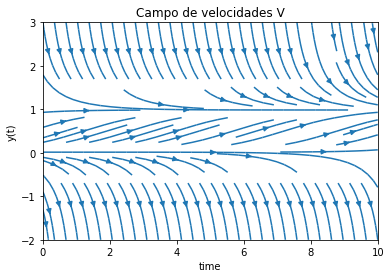

In [44]:
#Alternativa para graficar campos de velocidades
plt.streamplot(T, Y, ux, uy,density = 1)
plt.title("Campo de velocidades V")
plt.xlabel('time')
plt.ylabel('y(t)')
plt.axis([t0, tf, ymin, ymax])
plt.show()

Del campo de velocidades podemos inferir lo siguiente:

- El punto de equilibrio es : 1 


- El punto de silla es : -1

- La solución es creciente para condiciones iniciales $y_0$ en $(1,0)$, pero nunca sobrepasaran el valor de 1.

- La solución es decreciente para condiciones iniciales $y_0$ en $(\infty,1)$ y  $(0,-\infty,1)$. En el primer caso decaen al valor de $1$ y en el segundo caso no se puede establecer con el campo de velocidades obtenido.


**Solución con metodo de Euler**

Podemos usar el código del taller anterior!....solo debemos cambiar la función y las condiciones iniciales!. Resolveremos el ejercicio para  condiciones iniciales $t_0 = 0$ y $y_0 = 0.1$ y  $t_0 = 0$ y $y_0 = 2$. 

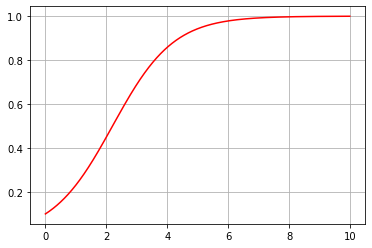

In [18]:
#importamos las librerias de numpy

import numpy as np
import matplotlib.pyplot as plt


#--------Ecuacion diferencial-----
def Ec_differencial( y ):
    dydt = y - y**2
    return dydt
#---------------------------------


#PARAMETROS
t0 = 0
tf = 10 #Segundos por hora!
dt = 0.01


#lista de tiempos  
t = np.arange(t0,tf,dt)


#Numero de tiempos
N = len(t)


#lista los valores de la función
y1 = np.zeros_like(t)

#asigno el valor inicial
y1[0] =  0.1 


#Aplicamos la formula de Euler
for i in range( N-1 ):
    y1[i+1] = y1[i] +  dt* Ec_differencial(y1[i])
       

plt.plot(t, y1,'-r')
plt.grid()
plt.show()

- Caso $t_0$, $y_0 = 2$

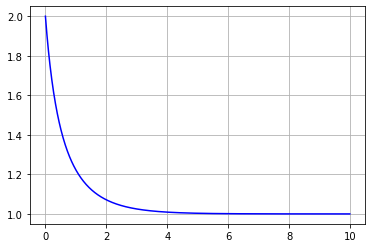

In [11]:
#importamos las librerias de numpy

import numpy as np
import matplotlib.pyplot as plt


#--------Ecuacion diferencial-----
def Ec_differencial(t, y ):
    dydt = y - y**2
    return dydt
#---------------------------------


#PARAMETROS
t0 = 0
tf = 10 #Segundos por hora!
dt = 0.01


#lista de tiempos  
t = np.arange(t0,tf,dt)


#Numero de tiempos
N = len(t)


#lista los valores de la función
y2 = np.zeros_like(t)

#asigno el valor inicial
y2[0] =  2 


#Aplicamos la formula de Euler
for i in range( N-1 ):
    y2[i+1] = y2[i] +  dt* Ec_differencial(t[i],y2[i])
       

plt.plot(t, y2,'-b')
plt.grid()
plt.show()

### Ejercicio

Usando la fisica Newtoniana se obtiene la ecuación de movimiento del pendulo 

\begin{equation}
\dfrac{d^2 \theta}{d t^2} + \dfrac{g}{l}\sin\theta  = 0 .
\end{equation}

Esta ecuación es dificil de solucionar de forma exacta por que es NO lineal. Ademas, como es una ecuacion diferencial de segundo orden, tenemos que definir la nueva variable (velocidad) como $v = \dfrac{d\theta}{d t}$ y asi obtenemos el sistema: 

\begin{eqnarray}
\dfrac{d \theta}{d t} &=& v, \\
\dfrac{d v}{d t} &=& -\dfrac{g}{l}\sin\theta.
\end{eqnarray}


El campo de velocidades para este sistema en el plano $(\theta, v)$ en cierto punto $(\theta_0, v_0)$ se puede definir como como 

\begin{equation}
u \big|_{\theta_0,v_0}  = (u_1 , u_2) :=\dfrac{1}{\sqrt{ V_1^2 +  V_2^2 } } ( V_1 ,  V_2).
\end{equation}

donde $ V_1 = \dfrac{d \theta}{dt}\big|_{t_0,y_0} $ y  $V_2 = \dfrac{d v}{dt} \big|_{t_0,y_0} $. Con la informacion anterior, y asumiendo la longitud del pendulo igual a 1:

- Grafique el campo de velocidades de este sistema para $\theta \in [- \pi, \pi]$ y  $v \in [-2 \pi,2 \pi]$.

- Del campo de velocidades estime el valor maximo que alcanza $\theta$ si se comienza con un dato inicial de $\theta_0 =0$ y $v_0=1$

- Del campo de velocidades estime el valor maximo que alcanza la velocidad $v$ si se comienza con un dato inicial de $\theta_0 =0$ y $v_0=0$

- Resuelva el sistema utilizando el metodo de Euler y grafique la funcion de $\theta$ contra $t$ partiendo de la condicion inicial $(\theta_0, v_0)=(0,1)$. Use un dominio para $t$ en $[0, \pi]$ y un tamaño de paso de $0.0001$. 
